In [2]:
from utils.Ranker import DocumentRanker
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

ranker = DocumentRanker()
ranker.create_tfidf()

## Most and Least popular tokens in dataframe

C:\Users\kalmu\AppData\Local\Temp/ipykernel_10544/1042121599.py:21: UserWarning: Glyph 68426 (\N{INSCRIPTIONAL PARTHIAN LETTER KAPH}) missing from current font.
  plt.tight_layout()
C:\Users\kalmu\AppData\Local\Temp/ipykernel_10544/1042121599.py:21: UserWarning: Glyph 68421 (\N{INSCRIPTIONAL PARTHIAN LETTER WAW}) missing from current font.
  plt.tight_layout()
C:\Users\kalmu\AppData\Local\Temp/ipykernel_10544/1042121599.py:21: UserWarning: Glyph 68436 (\N{INSCRIPTIONAL PARTHIAN LETTER SHIN}) missing from current font.
  plt.tight_layout()
C:\Users\kalmu\AppData\Local\Temp/ipykernel_10544/1042121599.py:21: UserWarning: Glyph 68429 (\N{INSCRIPTIONAL PARTHIAN LETTER NUN}) missing from current font.
  plt.tight_layout()
c:\Users\kalmu\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:137: UserWarning: Glyph 68426 (\N{INSCRIPTIONAL PARTHIAN LETTER KAPH}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\kalmu\AppData\Local\Progr

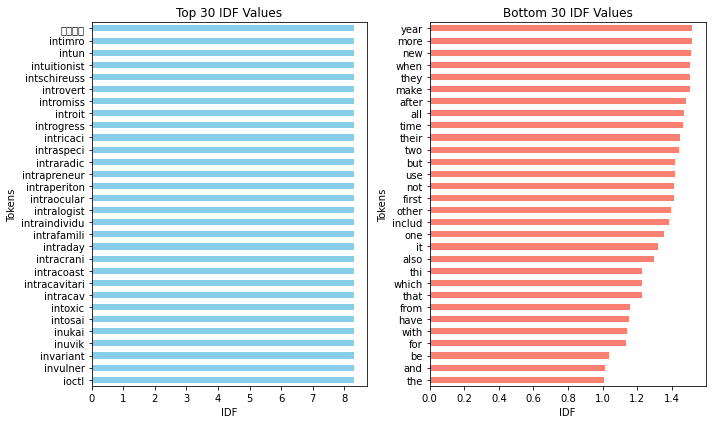

In [3]:
tf_idf = ranker.tfidf_sublinear_true
idf_series = pd.Series(tf_idf.idf_, index=tf_idf.get_feature_names_out()).sort_values()

top_10_idf = idf_series.tail(30)

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
top_10_idf.plot(kind='barh', color='skyblue')
plt.title('Top 30 IDF Values')
plt.xlabel('IDF')
plt.ylabel('Tokens')

bottom_30_idf = idf_series.head(30)

plt.subplot(1, 2, 2)
bottom_30_idf.plot(kind='barh', color='salmon')
plt.title('Bottom 30 IDF Values')
plt.xlabel('IDF')
plt.ylabel('Tokens')

plt.tight_layout()
plt.show()

## Frequency plot of tokens 

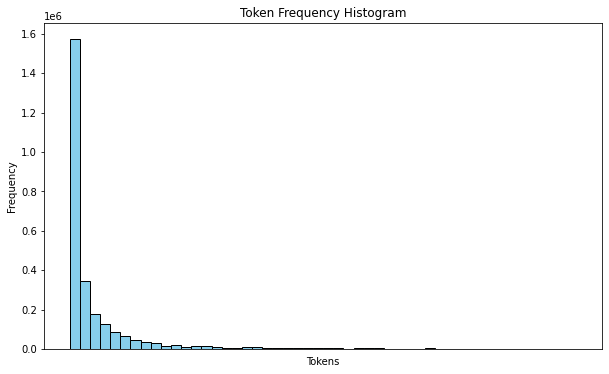

In [9]:
documents_df = pd.read_csv('data.csv')
all_tokens = []
for i in range(0, len(documents_df)):
    tokens = documents_df.iloc[i]['tokens'].replace('[', '').replace(']', '').replace('\'', '').split(', ')
    all_tokens.extend(tokens)

plt.figure(figsize=(10, 6))
plt.hist(all_tokens, bins=50, color='skyblue', edgecolor='black')
plt.title('Token Frequency Histogram')
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.xticks([]) 
plt.show()

plot shows exponential like existence of tokens in documents, that's why use of idf that takes log to counteract that 

## Most popular words in urls

In [15]:
documents_df['url'] = documents_df['url'].str.replace('/wiki/', '')

all_words = [word.lower() for url in documents_df['url'] for word in url.split('_')]

word_counts = pd.Series(all_words).value_counts()

print(word_counts.head(20))

of              177
the              77
in               51
and              32
united           30
list             28
states           23
college          22
station          20
national         19
new              17
(crater)         16
county,          16
railway          15
contest          15
song             15
eurovision       15
york             13
(identifier)     13
university       12
dtype: int64
